## Handwritten character recognition
### Data interpretation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("data/A_Z Handwritten Data.csv").astype('float32')

In [3]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can observe that the first column is the label, while the others are the values for each pixel in the image.

### Splitting the data into labels and images

In [5]:
x = data.drop('0',axis = 1)
y = data['0']

In [6]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float32

In [7]:
y.tail()

372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, dtype: float32

### Splitting the data into train and test data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

X_train = np.reshape(X_train.values, (X_train.shape[0], 28, 28))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28, 28))

print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


### Showing a graphical representation of the count for each letter

In [9]:
letter_dict = { 0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X',  24:'Y', 25:'Z' }

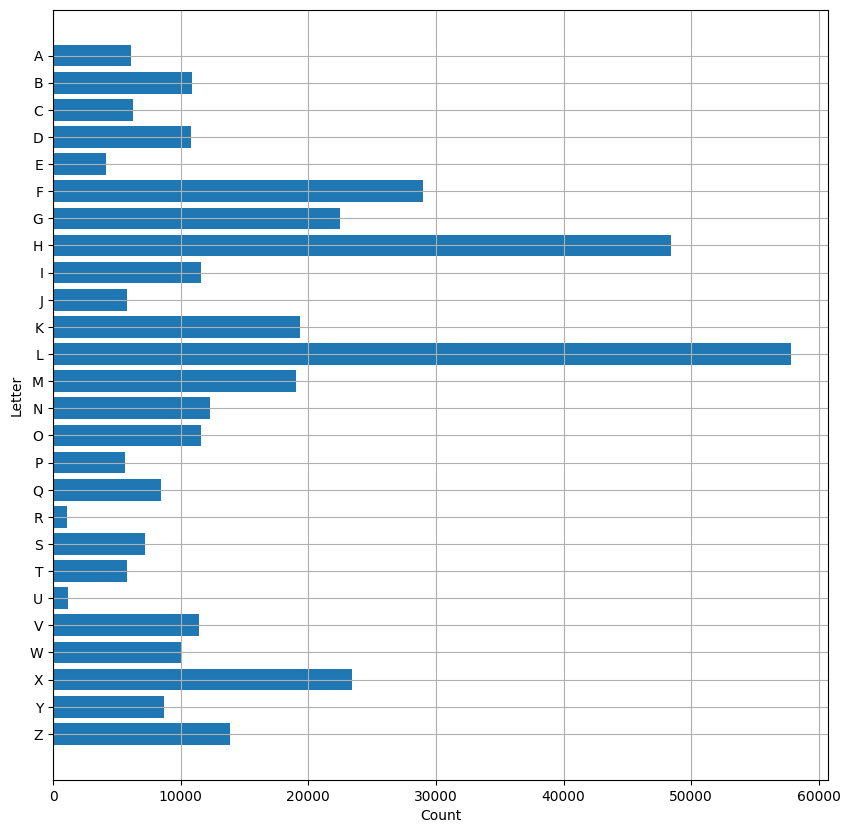

In [10]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] += 1

letters = []
for i in letter_dict.values():
    letters.insert(0, i)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.barh(letters, count)

plt.xlabel("Count")
plt.ylabel("Letter")
plt.grid()
plt.show()

### Preview a small sub-section of the train data

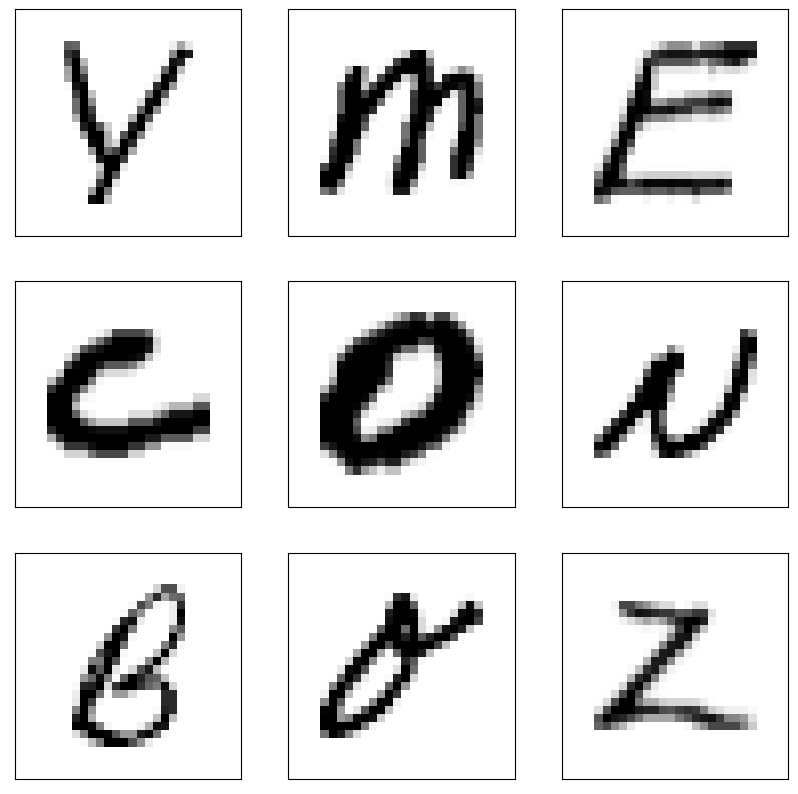

In [11]:
section = shuffle(X_train)[:9]

fig, ax = plt.subplots(3, 3, figsize = (10, 10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(section[i], (28, 28)), cmap="Greys")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

### Re-shaping the data

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print("New shape of train data: ", X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print("New shape of train data: ", X_test.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In order to use the "LeNet" convolutional neural network we need the data to have the shape 28 (height) x 28 (width) x 1 (channel)

### Converting labels to categorical values

In [13]:
Y_train_cat = to_categorical(Y_train, num_classes=26, dtype='int')
print(Y_train_cat.shape)

Y_test_cat = to_categorical(Y_test, num_classes=26, dtype='int')
print(Y_test_cat.shape)

(297960, 26)
(74490, 26)


### Building the model

Using the LeNet CNN

In [14]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='valid'))
model.add(MaxPool2D(strides=2))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [15]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train_cat, epochs=1, validation_data=(X_test, Y_test_cat))

9312/9312 [==============================] - 48s 5ms/step - loss: 0.2524 - accuracy: 0.9389 - val_loss: 0.1018 - val_accuracy: 0.9711
